In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dropout

In [4]:
from tensorflow.keras import utils  #用於分類資料轉換等 Keras 工具
np.random.seed(10) #設定隨機種子，讓每次程式產生的隨機值都一致

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

資料預處理

In [6]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [7]:
x_Train_normalize = x_train_image/255
x_Test_normalize = x_test_image/255

In [8]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [9]:
x_train_image.shape

(50000, 32, 32, 3)

模型建立

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32,(5,5),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPool2D())

In [14]:
model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPool2D())

In [17]:
model.add(Flatten())

In [18]:
model.add(Dropout(0.25))

In [19]:

model.add(Dense(
    units = 1024,
    kernel_initializer='normal',
    activation='relu'))

In [20]:
model.add(Dropout(0.25))

In [ ]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [21]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,256 (16.08 MB)

 Trainable params: 4,216,256 (16.08 MB)

 Non-trainable params: 0 (0.00 B)

None


訓練模型

In [25]:
model.compile(
    loss='categorical_crossentropy',  # 損失函數
    optimizer= Adam(learning_rate = 0.001),                 # 最佳化器
    metrics=['accuracy']             # 評估指標
)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

# Set random seed for reproducibility
np.random.seed(10)

# Set Matplotlib font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data Preprocessing
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

# Normalize pixel values
x_Train_normalize = x_train_image / 255
x_Test_normalize = x_test_image / 255

# One-hot encode the labels
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

# Model Definition
model = Sequential()

model.add(Conv2D(32,(5,5),padding='same',
         input_shape=(32,32,3),
         activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dropout(0.25))

# This is the layer causing the shape mismatch in the error message.
# Ensure the model correctly connects to the final output layer.
model.add(Dense(
    units = 1024,
    kernel_initializer='normal',
    activation='relu'))
model.add(Dropout(0.25))

# This is the final output layer with 10 units for 10 classes.
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification with one-hot encoding
    optimizer= Adam(learning_rate = 0.001), # Adam optimizer with a specified learning rate
    metrics=['accuracy']             # Metric to evaluate during training
)

# Train the model
train_history = model.fit(
    x = x_Train_normalize,         # Training data (features) - already normalized
    y = y_Train_OneHot,            # Training labels (target) - One-hot encoded
    validation_split = 0.2,        # Use 20% of the training data as validation data
    epochs = 20,                   # Number of training epochs
    batch_size = 128,              # Number of samples per gradient update
    verbose = 2,                   # Display training process info (2 for concise output per epoch)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,226,506 (16.12 MB)

 Trainable params: 4,226,506 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
313/313 - 140s - 447ms/step - accuracy: 0.4174 - loss: 1.6268 - val_accuracy: 0.5458 - val_loss: 1.3685
Epoch 2/20
313/313 - 140s - 448ms/step - accuracy: 0.5557 - loss: 1.2430 - val_accuracy: 0.6017 - val_loss: 1.2441
Epoch 3/20
313/313 - 133s - 425ms/step - accuracy: 0.6195 - loss: 1.0843 - val_accuracy: 0.6401 - val_loss: 1.1071
Epoch 4/20
313/313 - 149s - 476ms/step - accuracy: 0.6619 - loss: 0.9564 - val_accuracy: 0.6709 - val_loss: 0.9919
Epoch 5/20
313/313 - 134s - 430ms/step - accuracy: 0.6988 - loss: 0.8566 - val_accuracy: 0.6780 - val_loss: 0.9573
Epoch 6/20
313/313 - 138s - 441ms/step - accuracy: 0.7352 - loss: 0.7530 - val_accuracy: 0.7008 - val_loss: 0.8961
Epoch 7/20
313/313 - 142s - 455ms/step - accuracy: 0.7674 - loss: 0.6657 - val_accuracy: 0.7106 - val_loss: 0.8631
Epoch 8/20
313/313 - 137s - 437ms/step - accuracy: 0.7975 - loss: 0.5761 - val_accuracy: 0.7241 - val_loss: 0.8250
Epoch 9/20
313/313 - 142s - 455ms/step - accuracy: 0.8253 - loss: 0.4999 - 

以圖形顯示訓練過程

In [2]:
train_history.history

{'accuracy': [0.41737499833106995,
  0.5557000041007996,
  0.6195250153541565,
  0.6618750095367432,
  0.6988000273704529,
  0.7352250218391418,
  0.767425000667572,
  0.7975000143051147,
  0.8253250122070312,
  0.849399983882904,
  0.8692499995231628,
  0.8846250176429749,
  0.8989499807357788,
  0.9135500192642212,
  0.918874979019165,
  0.9274500012397766,
  0.9368000030517578,
  0.9391250014305115,
  0.9428250193595886,
  0.9459249973297119],
 'loss': [1.6267503499984741,
  1.2429803609848022,
  1.0842822790145874,
  0.956403911113739,
  0.8566250205039978,
  0.7530487179756165,
  0.6657153964042664,
  0.5760694146156311,
  0.4999430775642395,
  0.43182373046875,
  0.37406647205352783,
  0.32749125361442566,
  0.2926010191440582,
  0.25494399666786194,
  0.23305439949035645,
  0.20826737582683563,
  0.18752315640449524,
  0.17807696759700775,
  0.16498294472694397,
  0.15732641518115997],
 'val_accuracy': [0.545799970626831,
  0.6017000079154968,
  0.6401000022888184,
  0.670899987

In [3]:

import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

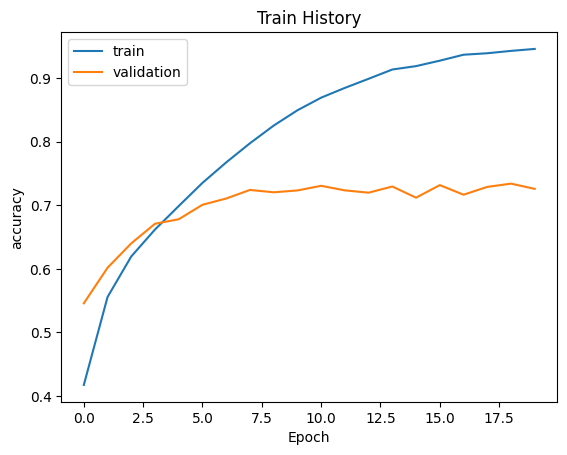

In [4]:
show_train_history(train_history,'accuracy','val_accuracy')

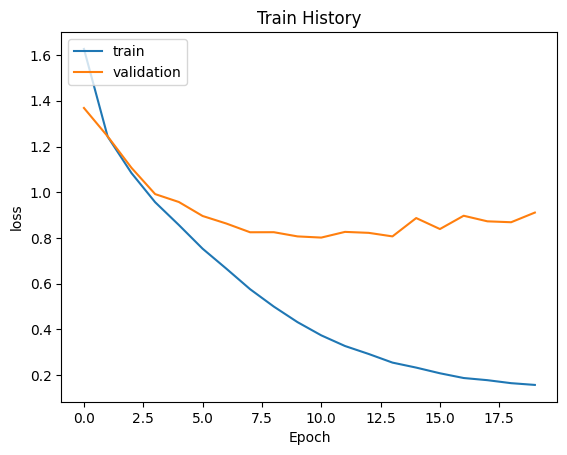

In [5]:
show_train_history(train_history,'loss','val_loss')

評估模型準確率

In [6]:

scores = model.evaluate(x_test_image, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6245 - loss: 193.4621

accuracy= 0.6280999779701233


進行預測

In [7]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:

prediction=model.predict(x_test_image)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


In [10]:
predicted_lable = np.argmax(prediction[6])
predicted_lable

np.int64(1)

神經網路預測是： car
實際是： car


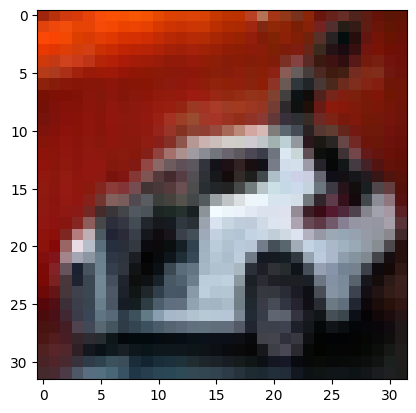

In [11]:
print('神經網路預測是：', class_names[predicted_lable])
print('實際是：', class_names[y_test_label[6].item()])
plt.imshow(x_test_image[6], cmap='Greys');

In [12]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])
        title = "label=" + str(class_names[labels[idx][0]]) + "\n"
        if prediction is not None:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

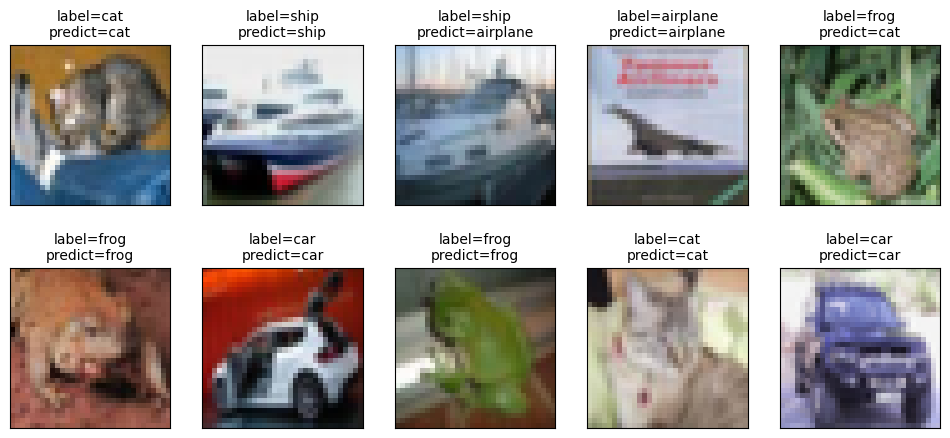

In [13]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

confusion matrix (混淆矩陣)

In [14]:
import pandas as pd
predicted_labels = np.argmax(prediction, axis=1)
pd.crosstab(y_test_label.ravel(), predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,854,25,10,13,2,2,5,14,41,34
1,35,844,0,3,0,6,1,4,29,78
2,201,22,356,91,27,125,33,85,27,33
3,82,34,28,448,12,201,25,86,34,50
4,142,16,61,153,259,87,35,202,20,25
5,57,9,21,152,7,608,19,81,17,29
6,42,27,18,124,11,64,624,32,32,26
7,34,8,9,27,11,52,2,824,5,28
8,189,43,1,8,0,7,1,12,690,49


In [15]:
df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10]

,label,predict
0,3,3
1,8,8
2,8,0
3,0,0
4,6,3
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1


In [16]:
df[(df.label==5)&(df.predict==3)]

,label,predict
33,5,3
128,5,3
158,5,3
178,5,3
200,5,3
...,...,...
9414,5,3
9586,5,3
9823,5,3
9829,5,3


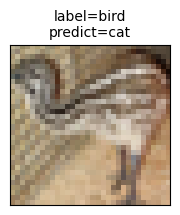

In [17]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

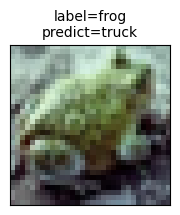

In [18]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [19]:
from google.colab import drive


In [20]:
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd 'content/drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'content/drive/My Drive/Colab Notebooks'
/content


In [22]:
model.save('/content/drive/My Drive/hw3_model.keras')

In [23]:
!ls "/content/drive/My Drive"

 0508.accdb
'13851_2018 高職物理課後作業2-1直線運動.pdf'
 3B032080_0515.accdb
 3B032080謝東霖
'3B032080謝東霖 (1).accdb'
 3B032080謝東霖.7z
 3B032080謝東霖.accdb
 3B032080謝東霖.docx
 3B032080謝東霖HW1
 3B032080謝東霖HW4.accdb
'Colab Notebooks'
 DIP
 hw3.ipynb
 hw3_model.keras
 IMG_9420.JPG
 IMG_9421.JPG
'Northwind (1)1 (1).accdb'
'Northwind (1)1 (2).accdb'
'Northwind (1)1.accdb'
'Northwind (1)1.accdb最新.accdb'
'Northwind (1).accdb'
 Northwind.ldb
 Northwind.mdb
 pythonclass
 Yeaaahjinmianshan
 使用者檔.xls
 價格檔.xls
 品項內容.xlsx
'專題PPT 影片'
 專題小論文
 庫存檔.xls
'未命名绘图 (1).drawio'
 未命名绘图.drawio
 申請人.xlsx
 申請日期.xlsx
 申請明細.xlsx
 申領檔.xls
 資料庫管理.docx
'電子學附屬教材 - Google 雲端硬碟'
